In [66]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import os 

In [67]:
train_len = glob('/content/drive/My Drive/birddataset/Training/*')
test_len = glob('/content/drive/My Drive/birddataset/Testing/*')
print(f' length of train_set is {len(train_len)}\n lenght of test_set is {len(test_len)}')

 length of train_set is 150
 lenght of test_set is 150


model = Sequential()

model.add(Conv2D(64,(3,3),strides = (1,1),padding='same',activation='relu',input_shape = [224,224,3]))
model.add(Conv2D(64,(3,3),strides = (1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),strides = (1,1),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),strides = (1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),strides = (1,1),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),strides = (1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(150,activation = 'softmax'))

#### TRANSFER LEARNING APPROACH

In [68]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [69]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/My Drive/birddataset/Training'
test_path = '/content/drive/My Drive/birddataset/Testing'

In [70]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)
for layer in vgg.layers:
  layer.trainable = False

In [71]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [72]:
x = Flatten()(vgg.output)

In [73]:
from tensorflow.keras.models import Model

In [74]:
predict = Dense(len(train_len),activation='softmax')(x)
model = Model(inputs = vgg.input,outputs = predict)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [75]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])


In [76]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale=1./255)


In [77]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/birddataset/Training',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
testing_set = test_datagen.flow_from_directory('/content/drive/My Drive/birddataset/Testing',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 6205 images belonging to 150 classes.
Found 354 images belonging to 150 classes.


In [84]:
r = model.fit_generator(training_set,
                        steps_per_epoch = len(training_set), 
                        epochs = 100,
                        validation_data = testing_set,
                        validation_steps = len(testing_set))

Epoch 1/100
194/194 [==============================] - 79s 407ms/step - loss: 0.1316 - accuracy: 0.9810 - val_loss: 3.6871 - val_accuracy: 0.7401
Epoch 2/100
194/194 [==============================] - 79s 409ms/step - loss: 0.1440 - accuracy: 0.9784 - val_loss: 3.3807 - val_accuracy: 0.7345
Epoch 3/100
194/194 [==============================] - 79s 407ms/step - loss: 0.1995 - accuracy: 0.9700 - val_loss: 4.1172 - val_accuracy: 0.7429
Epoch 4/100
194/194 [==============================] - 79s 406ms/step - loss: 0.1531 - accuracy: 0.9712 - val_loss: 3.9737 - val_accuracy: 0.7175
Epoch 5/100
194/194 [==============================] - 79s 406ms/step - loss: 0.1096 - accuracy: 0.9811 - val_loss: 3.2169 - val_accuracy: 0.7627
Epoch 6/100
194/194 [==============================] - 79s 409ms/step - loss: 0.1217 - accuracy: 0.9807 - val_loss: 3.8877 - val_accuracy: 0.7458
Epoch 7/100
194/194 [==============================] - 79s 409ms/step - loss: 0.1233 - accuracy: 0.9821 - val_loss: 3.3807 -

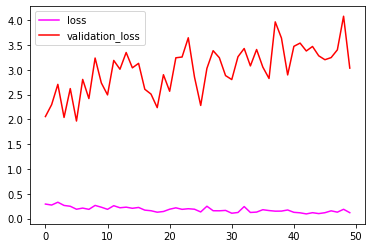

In [82]:
plt.plot(r.history['loss'],label = 'loss',color = 'magenta')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'red')
plt.legend()
plt.show()

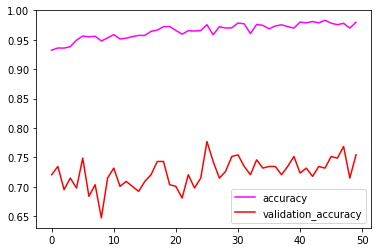

In [83]:
plt.plot(r.history['accuracy'],label = 'accuracy',color = 'magenta')
plt.plot(r.history['val_accuracy'],label = 'validation_accuracy',color = 'red')
plt.legend()
plt.show()

In [88]:
list = os.listdir('/content/drive/My Drive/birddataset/Training')
list

['PAINTED BUNTIG',
 'PALILA',
 'PELICAN',
 'OSTRICH',
 'PHILIPPINE EAGLE',
 'PARUS MAJOR',
 'PINK ROBIN',
 'PARADISE TANAGER',
 'PEREGRINE FALCON',
 'PEACOCK',
 'NORTHERN JACANA',
 'NORTHERN PARULA',
 'NORTHERN RED BISHOP',
 'NORTHERN MOCKINGBIRD',
 'NORTHERN GOSHAWK',
 'OCELLATED TURKEY',
 'NORTHERN GANNET',
 'OSPREY',
 'NORTHERN CARDINAL',
 'NORTHERN FLICKER',
 'NICOBAR PIGEON',
 'MOURNING DOVE',
 'MIKADO  PHEASANT',
 'MARABOU STORK',
 'MALEO',
 'MALACHITE KINGFISHER',
 'MYNA',
 'MANDRIN DUCK',
 'MALLARD DUCK',
 'MASKED BOOBY',
 'LEARS MACAW',
 'LONG-EARED OWL',
 'KILLDEAR',
 'KIWI',
 'LILAC ROLLER',
 'LARK BUNTING',
 'KAKAPO',
 'JAVAN MAGPIE',
 'KING VULTURE',
 'JABIRU',
 'HORNED GUAN',
 'INDIAN BUSTARD',
 'IMPERIAL SHAQ',
 'HOOPOES',
 'INCA TERN',
 'INDIGO BUNTING',
 'HORNBILL',
 'HOUSE SPARROW',
 'HOUSE FINCH',
 'HYACINTH MACAW',
 'HARPY EAGLE',
 'GREY PLOVER',
 'GRAY PARTRIDGE',
 'GOLDEN PHEASANT',
 'GOULDIAN FINCH',
 'HOODED MERGANSER',
 'GREEN JAY',
 'HAWAIIAN GOOSE',
 'GUINEAF

In [105]:
test_image = load_img('/content/drive/My Drive/birddataset/Testing/AMERICAN KESTREL/5.jpg',(224,224))
test_image = image.img_to_array(test_image)
predict = np.expand_dims(test_image,axis = 0)
result = model.predict(predict)

In [106]:
result

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [107]:
if result[0][0] == 1:
    predict = 'FIREFINCH'
    print(predict)
elif result[0][1] == 1:
  predict = 'ALBATROSS'
  print(predict)
elif result[0][2] == 1:
  predict = 'ALEXEDRINE'
  print(predict)
elif result[0][3] == 1:
  print("AVOCET")
elif result[0][4] == 1:
  print("BITTERN")
elif result[0][5] == 1:
  print("COOT")
elif result[0][6] == 1:
  print("GOLDFINCH")
elif result[0][7] == 1:
  print("KESTREL")


KESTREL


In [108]:
model.save('birdsclassi.h5')